In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_location = '../Resources/Crime_Data_from_2010_to_Present.csv'
code_location = '../Resources/macrcode.csv'

crime_data = pd.read_csv(file_location)
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [2]:
org_crime_data = crime_data.drop(columns=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Rpt Dist No', 
                             'Part 1-2', 'Status', 'Status Desc', 'LOCATION', 'Cross Street', 'Vict Age',
                                             'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 
                                             'Weapon Desc', 'AREA NAME', 'Mocodes'])
clean_data = org_crime_data.rename(columns={'Date Rptd':'date_reported'})

clean_data.head()

,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",34.0387,-118.2488


In [3]:
year = pd.DatetimeIndex(clean_data['date_reported']).year
year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date_reported', length=2053949)

In [4]:
clean_data['year'] = year.astype(str)
clean_data.head()

,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,33.9825,-118.2695,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33.9599,-118.3962,2010
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,34.0224,-118.2524,2010
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,34.1016,-118.3295,2010
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",34.0387,-118.2488,2010


In [5]:
clean_data['date_reported'] = pd.to_datetime(clean_data['date_reported'])
clean_data['date_reported'].head()

0   2010-02-20
1   2010-09-13
2   2010-08-09
3   2010-01-05
4   2010-01-03
Name: date_reported, dtype: datetime64[ns]

In [6]:
clean_data.head()

,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year
0,1307355,2010-02-20,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,33.9825,-118.2695,2010
1,11401303,2010-09-13,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33.9599,-118.3962,2010
2,70309629,2010-08-09,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,34.0224,-118.2524,2010
3,90631215,2010-01-05,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,34.1016,-118.3295,2010
4,100100501,2010-01-03,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",34.0387,-118.2488,2010


In [7]:
lon_sample = clean_data[clean_data['LON'].between(-118.2800, -118.2600)]
mid_LA_sample = lon_sample[lon_sample['LAT'].between(34.0000, 34.2000)]
mid_LA_sample.head()

,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year
6,100100508,2010-01-08,01/07/2010 12:00:00 AM,2005,1,330,BURGLARY FROM VEHICLE,34.0389,-118.2643,2010
8,100100510,2010-01-09,01/09/2010 12:00:00 AM,230,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.0450,-118.2640,2010
12,100100523,2010-01-15,01/15/2010 12:00:00 AM,245,1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34.0409,-118.2609,2010
16,100100552,2010-01-23,01/23/2010 12:00:00 AM,1225,1,237,CHILD NEGLECT (SEE 300 W.I.C.),34.0401,-118.2668,2010
23,100100571,2010-01-31,01/31/2010 12:00:00 AM,1000,1,624,BATTERY - SIMPLE ASSAULT,34.0382,-118.2665,2010


In [8]:
df_crime_code = pd.DataFrame(mid_LA_sample['Crm Cd'])
mid_LA_sample['Crime Code'] = df_crime_code
mid_LA_sample.head()

C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year,Crime Code
6,100100508,2010-01-08,01/07/2010 12:00:00 AM,2005,1,330,BURGLARY FROM VEHICLE,34.0389,-118.2643,2010,330
8,100100510,2010-01-09,01/09/2010 12:00:00 AM,230,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.0450,-118.2640,2010,230
12,100100523,2010-01-15,01/15/2010 12:00:00 AM,245,1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34.0409,-118.2609,2010,740
16,100100552,2010-01-23,01/23/2010 12:00:00 AM,1225,1,237,CHILD NEGLECT (SEE 300 W.I.C.),34.0401,-118.2668,2010,237
23,100100571,2010-01-31,01/31/2010 12:00:00 AM,1000,1,624,BATTERY - SIMPLE ASSAULT,34.0382,-118.2665,2010,624


In [9]:
crime_count = 1
mid_LA_sample['Crime Count'] = crime_count
mid_LA_sample.head()

C:\Users\dntjd\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year,Crime Code,Crime Count
6,100100508,2010-01-08,01/07/2010 12:00:00 AM,2005,1,330,BURGLARY FROM VEHICLE,34.0389,-118.2643,2010,330,1
8,100100510,2010-01-09,01/09/2010 12:00:00 AM,230,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.0450,-118.2640,2010,230,1
12,100100523,2010-01-15,01/15/2010 12:00:00 AM,245,1,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34.0409,-118.2609,2010,740,1
16,100100552,2010-01-23,01/23/2010 12:00:00 AM,1225,1,237,CHILD NEGLECT (SEE 300 W.I.C.),34.0401,-118.2668,2010,237,1
23,100100571,2010-01-31,01/31/2010 12:00:00 AM,1000,1,624,BATTERY - SIMPLE ASSAULT,34.0382,-118.2665,2010,624,1


In [10]:
count_crime = mid_LA_sample.groupby(['Crime Code', 'year', 'date_reported']).sum()
count_crime = count_crime.sort_values(by='date_reported')
count_crime

,,,DR_NO,TIME OCC,AREA,Crm Cd,LAT,LON,Crime Count
Crime Code,year,date_reported,,,,,,,
626,2010,2010-01-01,300612101,3355,6,1878,102.1723,-354.8332,3
121,2010,2010-01-01,100204033,330,2,121,34.0544,-118.2767,1
624,2010,2010-01-01,400716076,2390,7,2496,136.2129,-473.0866,4
230,2010,2010-01-01,303712178,4190,37,690,102.1225,-354.8003,3
745,2010,2010-01-01,403916111,1100,39,2980,136.2127,-473.0750,4
740,2010,2010-01-01,200408043,110,4,1480,68.1075,-236.5438,2
860,2010,2010-01-01,100204031,1100,2,860,34.0534,-118.2745,1
220,2010,2010-01-01,100204011,50,2,220,34.0549,-118.2778,1
900,2010,2010-01-01,101304057,1800,13,900,34.0207,-118.2619,1


In [11]:
total_crime = mid_LA_sample.groupby(['year']).sum()
total_crime

,DR_NO,TIME OCC,AREA,Crm Cd,LAT,LON,Crime Code,Crime Count
year,,,,,,,,
2010,1167877755568,16190114,70934,5905570,395114.0714,-1.372289e+06,5905570,11603
2011,1248907831128,15769990,66837,5716198,384458.8873,-1.335270e+06,5716198,11290
2012,1373574581177,15602216,65360,5796423,387825.6735,-1.346978e+06,5796423,11389
2013,1451536583996,15216818,63383,5688501,378457.4319,-1.314455e+06,5688501,11114
2014,1617941877568,15796269,67527,5924433,391837.2142,-1.360935e+06,5924433,11507
2015,1897294773904,17078866,71628,6274521,429012.6866,-1.490083e+06,6274521,12599
2016,2096019456172,17839263,77557,6532341,444331.9088,-1.543306e+06,6532341,13049
2017,2286996602953,18391204,76955,6764148,456455.5590,-1.585409e+06,6764148,13405
2018,2411713344206,18206512,74178,6764171,454721.4920,-1.579375e+06,6764171,13354


In [12]:
total_crime = total_crime.drop(['2019'])
total_crime

,DR_NO,TIME OCC,AREA,Crm Cd,LAT,LON,Crime Code,Crime Count
year,,,,,,,,
2010,1167877755568,16190114,70934,5905570,395114.0714,-1.372289e+06,5905570,11603
2011,1248907831128,15769990,66837,5716198,384458.8873,-1.335270e+06,5716198,11290
2012,1373574581177,15602216,65360,5796423,387825.6735,-1.346978e+06,5796423,11389
2013,1451536583996,15216818,63383,5688501,378457.4319,-1.314455e+06,5688501,11114
2014,1617941877568,15796269,67527,5924433,391837.2142,-1.360935e+06,5924433,11507
2015,1897294773904,17078866,71628,6274521,429012.6866,-1.490083e+06,6274521,12599
2016,2096019456172,17839263,77557,6532341,444331.9088,-1.543306e+06,6532341,13049
2017,2286996602953,18391204,76955,6764148,456455.5590,-1.585409e+06,6764148,13405
2018,2411713344206,18206512,74178,6764171,454721.4920,-1.579375e+06,6764171,13354


In [13]:
total_crime = total_crime.reset_index()
total_crime

,year,DR_NO,TIME OCC,AREA,Crm Cd,LAT,LON,Crime Code,Crime Count
0,2010,1167877755568,16190114,70934,5905570,395114.0714,-1.372289e+06,5905570,11603
1,2011,1248907831128,15769990,66837,5716198,384458.8873,-1.335270e+06,5716198,11290
2,2012,1373574581177,15602216,65360,5796423,387825.6735,-1.346978e+06,5796423,11389
3,2013,1451536583996,15216818,63383,5688501,378457.4319,-1.314455e+06,5688501,11114
4,2014,1617941877568,15796269,67527,5924433,391837.2142,-1.360935e+06,5924433,11507
5,2015,1897294773904,17078866,71628,6274521,429012.6866,-1.490083e+06,6274521,12599
6,2016,2096019456172,17839263,77557,6532341,444331.9088,-1.543306e+06,6532341,13049
7,2017,2286996602953,18391204,76955,6764148,456455.5590,-1.585409e+06,6764148,13405
8,2018,2411713344206,18206512,74178,6764171,454721.4920,-1.579375e+06,6764171,13354


In [14]:
x_axis = np.arange(len(total_crime))
tick_locations = [value for value in x_axis]

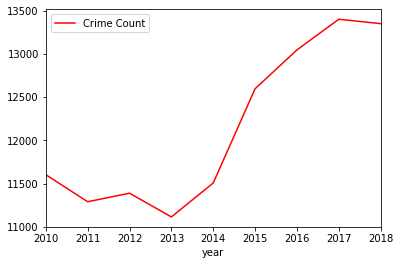

In [15]:
total_crime.plot(kind='line', x='year', y='Crime Count', color='r')

In [17]:
mid_LA_sample = mid_LA_sample.sort_values(by='date_reported')
mid_LA_sample

,DR_NO,date_reported,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,LAT,LON,year,Crime Code,Crime Count
7065,100204031,2010-01-01,01/01/2010 12:00:00 AM,1100,2,860,BATTERY WITH SEXUAL CONTACT,34.0534,-118.2745,2010,860,1
7059,100204024,2010-01-01,01/01/2010 12:00:00 AM,100,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",34.0544,-118.2767,2010,740,1
7074,100204043,2010-01-01,01/01/2010 12:00:00 AM,1540,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,34.0710,-118.2759,2010,930,1
88089,101104035,2010-01-01,01/01/2010 12:00:00 AM,200,11,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34.1334,-118.2690,2010,745,1
88095,101104054,2010-01-01,01/01/2010 12:00:00 AM,135,11,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.0781,-118.2609,2010,230,1
111786,101304024,2010-01-01,01/01/2010 12:00:00 AM,400,13,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34.0029,-118.2740,2010,745,1
111787,101304027,2010-01-01,01/01/2010 12:00:00 AM,200,13,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),34.0127,-118.2682,2010,745,1
111791,101304057,2010-01-01,01/01/2010 12:00:00 AM,1800,13,900,VIOLATION OF COURT ORDER,34.0207,-118.2619,2010,900,1
7053,100204011,2010-01-01,01/01/2010 12:00:00 AM,50,2,220,ATTEMPTED ROBBERY,34.0549,-118.2778,2010,220,1
7054,100204014,2010-01-01,01/01/2010 12:00:00 AM,130,2,624,BATTERY - SIMPLE ASSAULT,34.0442,-118.2758,2010,624,1


In [148]:
import csv

In [155]:
mid_LA_sample.to_csv('mid_LA_crime.csv')